# KMeans Clustering on Melbourne Housing Data (No Preprocessing)

Objective: Cluster properties based on 'Price' and 'Rooms' to identify natural market segments without feature scaling.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

%matplotlib inline
sns.set_style('whitegrid')

## 1. Load Data

In [2]:
# Load the dataset
try:
    df = pd.read_csv('../csv/midterm_dataset/melb_data.csv')
except FileNotFoundError:
    print("Error: 'Melbourne_housing_FULL.csv' not found. Please check the file path.")
    df = pd.DataFrame() # Create an empty DataFrame to avoid further errors

if not df.empty:
    print("First 5 rows of the dataset:")
    print(df.head())
    print("\nDataset Info:")
    print(df.info())

First 5 rows of the dataset:
       Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      2    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      2    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      3    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      3    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      4    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
4  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude    

## 2. Select Features and Handle Missing Values

We will use 'Price' and 'Rooms' for clustering.

In [3]:
if not df.empty:
    features = df[['Price', 'Rooms']].copy()
    
    # Handle missing values by dropping rows with NaNs in these columns
    initial_rows = len(features)
    features.dropna(inplace=True)
    final_rows = len(features)
    
    print(f"Initial number of rows: {initial_rows}")
    print(f"Number of rows after dropping NaNs: {final_rows}")
    print(f"Number of rows dropped: {initial_rows - final_rows}")
    print("\nSelected features head:")
    print(features.head())

Initial number of rows: 13580
Number of rows after dropping NaNs: 13580
Number of rows dropped: 0

Selected features head:
       Price  Rooms
0  1480000.0      2
1  1035000.0      2
2  1465000.0      3
3   850000.0      3
4  1600000.0      4


## 3. Determine Optimal Number of Clusters (Elbow Method)

The Elbow method helps in finding the optimal number of clusters (K) by plotting the sum of squared distances (inertia) against the number of clusters. We look for an 'elbow' point where adding more clusters doesn't significantly reduce inertia.

d:\Projects\machine-learning\venv\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "d:\Projects\machine-learning\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\ajapa\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\ajapa\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\ajapa\AppData\Local\Program

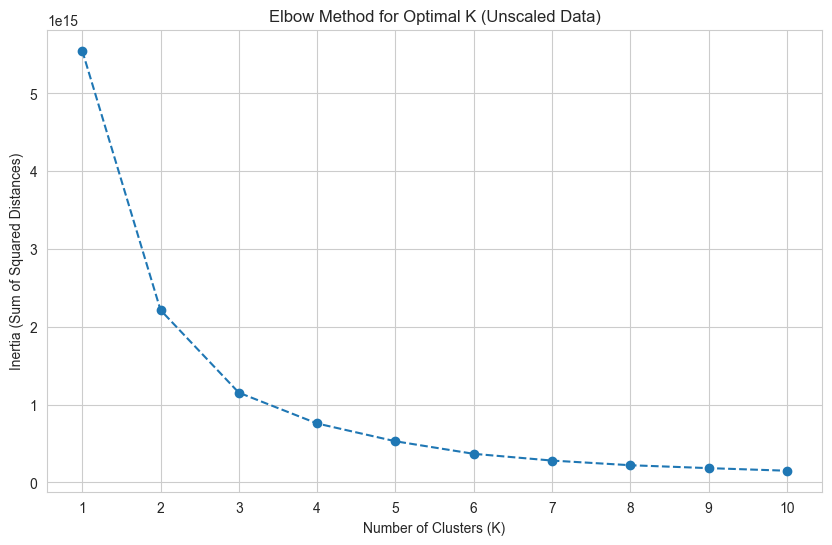

In [4]:
if not features.empty and len(features) > 10: # Ensure enough data for clustering
    inertia = []
    k_range = range(1, 11)
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
        kmeans.fit(features[['Price', 'Rooms']])
        inertia.append(kmeans.inertia_)
    
    plt.figure(figsize=(10, 6))
    plt.plot(k_range, inertia, marker='o', linestyle='--')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('Inertia (Sum of Squared Distances)')
    plt.title('Elbow Method for Optimal K (Unscaled Data)')
    plt.xticks(k_range)
    plt.grid(True)
    plt.show()
else:
    print("Not enough data points to perform Elbow method after cleaning.")

Based on the elbow plot, choose an appropriate K (e.g., where the 'elbow' occurs). For this dataset, 'Price' has a very large scale, which might make the elbow less distinct or suggest that price is the dominant factor. Let's assume K=3 for this example, but this should be reviewed based on the actual plot.

## 4. Apply KMeans Clustering

In [5]:
if not features.empty and len(features) > 10:
    optimal_k = 3 # Choose based on the elbow plot, e.g., 3 or 4
    kmeans_unscaled = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
    features['Cluster_Unscaled'] = kmeans_unscaled.fit_predict(features[['Price', 'Rooms']])
    
    print(f"Cluster centers (Unscaled Data) for K={optimal_k}:")
    # Centroids are [Price, Rooms] as per feature order
    centroid_df = pd.DataFrame(kmeans_unscaled.cluster_centers_, columns=['Price_Centroid', 'Rooms_Centroid'])
    print(centroid_df)
    print("\nFeatures head with cluster labels:")
    print(features.head())

Cluster centers (Unscaled Data) for K=3:
   Price_Centroid  Rooms_Centroid
0    7.021511e+05        2.632706
1    1.457695e+06        3.322625
2    2.821234e+06        3.996475

Features head with cluster labels:
       Price  Rooms  Cluster_Unscaled
0  1480000.0      2                 1
1  1035000.0      2                 0
2  1465000.0      3                 1
3   850000.0      3                 0
4  1600000.0      4                 1


## 5. Visualize Clusters

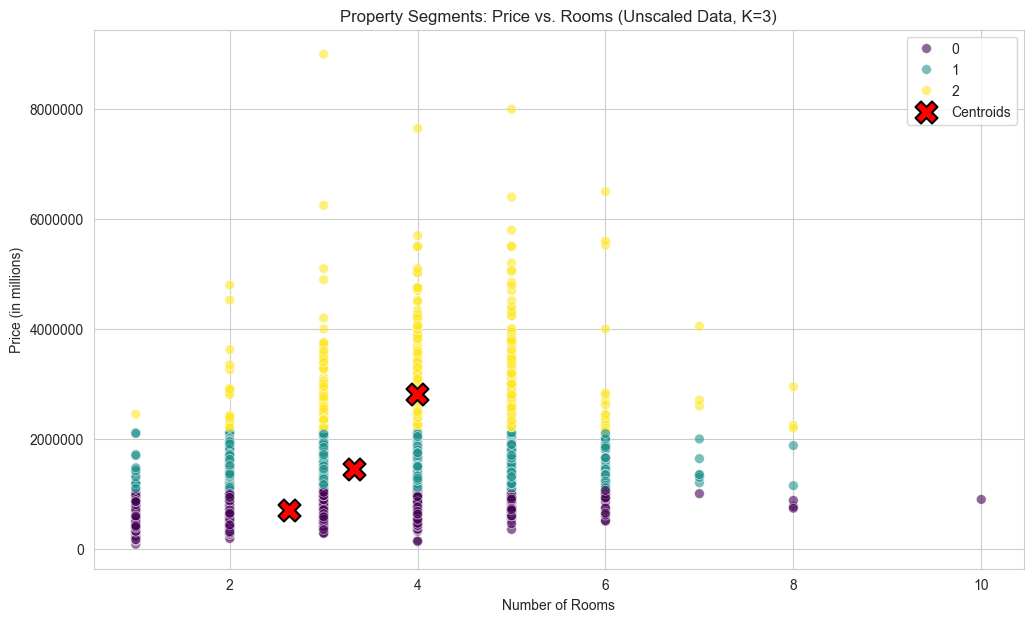

In [6]:
if not features.empty and 'Cluster_Unscaled' in features.columns:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data=features, x='Rooms', y='Price', hue='Cluster_Unscaled', palette='viridis', s=50, alpha=0.6)
    
    centroids = kmeans_unscaled.cluster_centers_
    # Scatter plot is x='Rooms', y='Price'. Centroids are [Price, Rooms].
    # So, x_centroid = centroids[:, 1] (Rooms), y_centroid = centroids[:, 0] (Price)
    plt.scatter(centroids[:, 1], centroids[:, 0], marker='X', s=250, color='red', label='Centroids', edgecolors='black', linewidth=1.5)
    
    plt.title(f'Property Segments: Price vs. Rooms (Unscaled Data, K={optimal_k})')
    plt.xlabel('Number of Rooms')
    plt.ylabel('Price (in millions)')
    plt.ticklabel_format(style='plain', axis='y') # Avoid scientific notation for price
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Clustering was not performed or 'Cluster_Unscaled' column is missing.")